In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
df=load_digits()


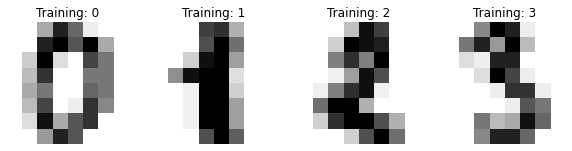

In [3]:
_,axes= plt.subplots(nrows=1, ncols=4,figsize=(10,3))
for ax, image, label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" %label)

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [8]:
n_samples=len(df.images)
data=df.images.reshape((n_samples, -1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data=data/16

In [15]:
data.min()

0.0

In [16]:
data.max()

1.0

In [17]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [18]:
from sklearn.model_selection import train_test_split
X_train,Xtest,Y_train,Ytest=train_test_split(data,df.target)
X_train.shape, Xtest.shape, Y_train.shape, Ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [20]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
y_pred=rf.predict(Xtest)

In [22]:
y_pred

array([3, 0, 5, 9, 9, 8, 9, 2, 3, 4, 6, 1, 9, 3, 4, 8, 1, 4, 7, 1, 7, 4,
       6, 8, 0, 6, 1, 3, 6, 0, 6, 0, 1, 1, 4, 9, 0, 2, 1, 8, 5, 3, 5, 0,
       7, 8, 6, 2, 5, 9, 3, 1, 8, 4, 5, 2, 1, 4, 6, 9, 6, 5, 5, 8, 5, 5,
       6, 7, 3, 7, 8, 5, 2, 4, 1, 3, 0, 5, 3, 0, 5, 3, 4, 9, 3, 2, 6, 9,
       5, 9, 5, 7, 3, 9, 4, 5, 1, 8, 0, 5, 9, 2, 1, 7, 2, 7, 1, 2, 0, 3,
       0, 6, 6, 6, 6, 7, 9, 5, 6, 9, 2, 4, 7, 6, 6, 2, 2, 5, 2, 2, 3, 0,
       5, 4, 6, 4, 3, 2, 7, 7, 9, 2, 6, 4, 5, 4, 2, 7, 6, 8, 3, 6, 6, 2,
       5, 9, 2, 5, 6, 3, 5, 7, 9, 6, 0, 9, 5, 2, 3, 1, 0, 5, 3, 5, 6, 9,
       8, 8, 5, 4, 0, 5, 6, 7, 9, 1, 0, 4, 1, 8, 7, 2, 4, 3, 2, 6, 0, 2,
       7, 7, 1, 6, 3, 6, 2, 4, 9, 5, 1, 8, 8, 1, 4, 9, 7, 4, 8, 8, 6, 9,
       9, 3, 4, 0, 9, 0, 2, 4, 8, 5, 3, 6, 6, 2, 7, 7, 8, 1, 7, 5, 8, 1,
       1, 6, 5, 5, 3, 9, 3, 4, 0, 1, 4, 0, 0, 6, 3, 7, 4, 8, 5, 1, 3, 5,
       9, 3, 9, 3, 4, 2, 5, 2, 2, 1, 4, 5, 0, 9, 0, 9, 7, 6, 3, 1, 3, 2,
       5, 6, 1, 1, 6, 4, 8, 1, 4, 3, 2, 2, 8, 4, 0,

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Ytest,y_pred)


array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  1, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 38]], dtype=int64)

In [24]:
print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        46
           2       0.98      1.00      0.99        43
           3       1.00      1.00      1.00        46
           4       1.00      0.98      0.99        49
           5       0.96      0.98      0.97        51
           6       0.98      1.00      0.99        54
           7       0.94      1.00      0.97        34
           8       0.97      0.87      0.92        38
           9       1.00      0.97      0.99        39

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

